In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  
from os.path import join
from pprint import pprint
import reverse_geocoder as rg
from geopy.distance import geodesic
#Abdullah Özgür İdiş, 20825

In [2]:
sns.set(style="darkgrid")
file="taxi-trips.csv"

df=pd.read_csv(file)
df.head()#column names can be seen here.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [3]:
df.dtypes #data types

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [4]:
row,col=df.shape
#number of rows and columns
print ("number of rows : " + "\n" + str(row) + "\n" )
print ("number of columns :" + "\n" + str(col))

number of rows : 
118185

number of columns :
11


In [5]:
dfc=df.copy()
pickd=dfc[["pickup_latitude","pickup_longitude"]].values
temp=[]
for i in pickd:
    temp.append(tuple(i))

res = rg.search(temp)

temp2=[]

for j in res:
    temp2.append(j["name"]) # admin2 may return whitespaces so I search for name instead.
    
df["pickup_district"]=temp2

Loading formatted geocoded file...


In [6]:
dfc=df.copy()
dropd=dfc[["dropoff_latitude","dropoff_longitude"]].values
tmp=[]
for i in dropd:
    tmp.append(tuple(i))
    
res = rg.search(tmp)

tmp2=[]

for j in res:
    tmp2.append(j["name"])# admin2 may return whitespaces so I search for name instead.
df["dropoff_district"]=tmp2

Top 5 preffered pickup districts are shown below: 



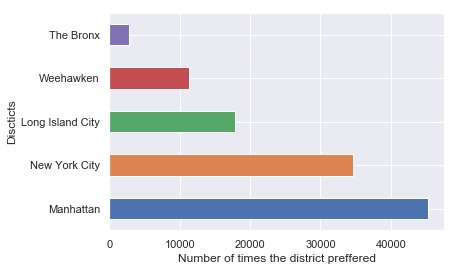

In [7]:
pdf = df["pickup_district"]
ddf = df["dropoff_district"]

print("Top 5 preffered pickup districts are shown below: \n")
plt.xlabel("Number of times the district preffered")
plt.ylabel("Discticts")
pdf.value_counts().nlargest(5).plot(kind = "barh")

#plotting the most popular pickup districts

Top 5 preffered dropoff districts are shown below: 



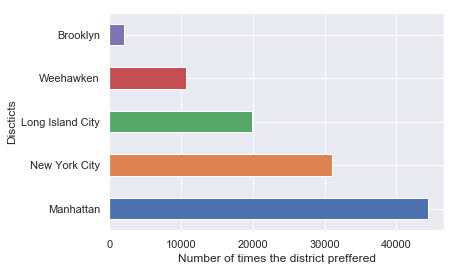

In [8]:
print("Top 5 preffered dropoff districts are shown below: \n")
plt.xlabel("Number of times the district preffered")
plt.ylabel("Discticts")
ddf.value_counts().nlargest(5).plot(kind = "barh")
#plotting the most popular dropoff districts

In [9]:
#calculating the distance from pickup and dropoff coordinations
dist = []
picklist = pickd
droplist= dropd
for i in range(len(picklist)):
    distance = geodesic(picklist[i], droplist[i]).miles
    dist.append(distance)

df["distance"] = dist

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103


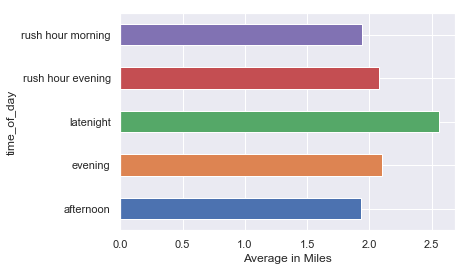

In [10]:
# the time of day 

timeofday = []

for i in range(len(df["pickup_datetime"])):
    start_index = df["pickup_datetime"][i].find(":")-2
    time = df["pickup_datetime"][i][start_index:len(df["pickup_datetime"][i])]
    timeofday.append(time)
    
param = " "
    
def sort_time(param):
    if("07:00:00"<=param<"09:00:00"):
        return "rush hour morning"
    elif("09:00:00"<=param<"16:00:00"):
        return "afternoon"
    elif("16:00:00"<=my_param<"18:00:00"):
        return "rush hour evening"
    elif("18:00:00"<=param<"23:00:00"):
        return "evening"
    else:return "latenight"

time_of_day = list()

for i in range(len(timeofday)):
    if(sort_time(timeofday[i])=="rush hour morning"):
        time_of_day.append("rush hour morning")
    elif(sort_time(timeofday[i])=="afternoon"):
        time_of_day.append("afternoon")
    elif(sort_time(timeofday[i])=="rush hour evening"):
        time_of_day.append("rush hour evening")
    elif(sort_time(timeofday[i])=="evening"):
        time_of_day.append("evening")
    elif(sort_time(timeofday[i])=="latenight"):
        time_of_day.append("latenight")
        
df["time_of_day"] = time_of_day

tod_group = df.groupby(by="time_of_day") # distance(in miles) vs time of day
meanby_distance = tod_group["distance"].mean()
plt.xlabel("Average in Miles")
meanby_distance.plot(kind="barh")
#plotting the relation between time of day and trip distance

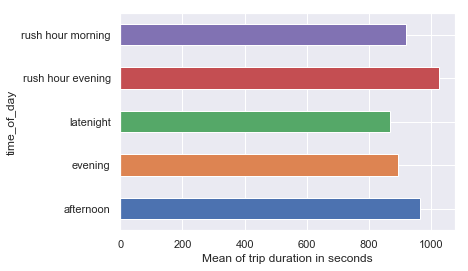

In [11]:
tod_group = df.groupby(by="time_of_day")
duration = tod_group["trip_duration"].mean()
plt.xlabel("Mean of trip duration in seconds")
duration.plot(kind="barh")
#plotting the relation between time of day and trip duration

Text(0, 0.5, 'Average Distance')

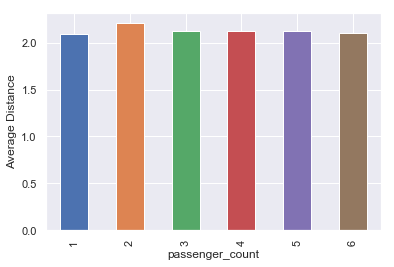

In [12]:
#null hypothesis 1
# drop rows where passenger_count is 0
df["passenger_count"].unique()
df = df[df["passenger_count"] >= 1]

pass_group= df.groupby(by="passenger_count")
pass_group["distance"].mean() 

pass_group["distance"].mean().plot(kind="bar")
plt.ylabel("Average Distance")

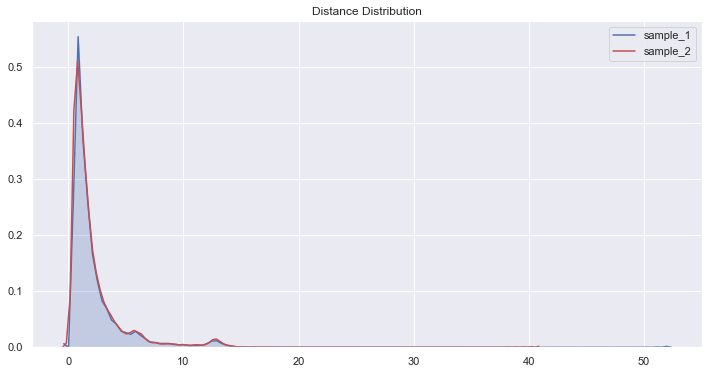

In [37]:
test = "distance"
# differentiating the subsamples with passenger numbers
sizeof_1 = df[df["passenger_count"] == 1][test] 
sizeof_n1 = df[df["passenger_count"] > 1 ][test]


fig, ax = plt.subplots(1,1,figsize=(12,6))

sns.kdeplot(sizeof_1, shade=True, label="sample_1", ax=ax, color="b")
sns.kdeplot(sizeof_n1, shade=False, label="sample_2", ax=ax, color="r")

plt.title("Distance Distribution")
plt.show()

In [38]:
stats.f_oneway(sizeof_1, sizeof_n1) 
#to get the p value, to be compared with 0.05
#if pval > 0.05
#hypothesis is true
#else its false

F_onewayResult(statistic=24.56439528437676, pvalue=7.196658293701785e-07)

In [15]:
#since pval is much smaller than 0.05, we reject the hypothesis
#passenger group size has no effect on the distance.

In [19]:
#null hypothesis 2 
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"]) # datetime conversion

dow = df["pickup_datetime"].dt.weekday_name # returns days of week 

weekday = []

for i in dow:
    if(i=="Monday"):
        weekday.append("Monday")
    elif(i=="Tuesday"):
        weekday.append("Tuesday")
    elif(i=="Wednesday"):
        weekday.append("Wednesday")
    elif(i=="Thursday"):
        weekday.append("Thursday")
    elif(i=="Friday"):
        weekday.append("Friday")
    elif(i=="Saturday"):
        weekday.append("Saturday")
    else:
        weekday.append("Sunday")
        
df["weekday"] = weekday #will be cleared out from csv file.
df.head()

C:\Users\Oden\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Oden\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day,Week_Days,weekday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush hour evening,Monday,Monday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening,Thursday,Thursday
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush hour morning,Friday,Friday
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon,Monday,Monday
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon,Monday,Monday


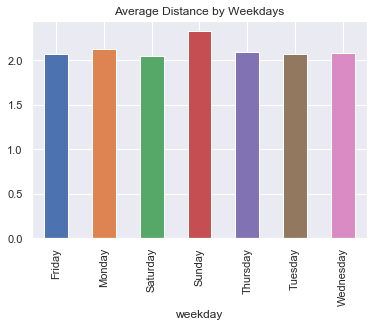

In [20]:
fig, ax = plt.subplots(1, 1)  

weekday_group = df.groupby(by="weekday")
weekday_dist = weekday_group["distance"].mean() 
weekday_dist.plot(kind="bar", ax=ax)
plt.title("Average Distance by Weekdays")
plt.show()

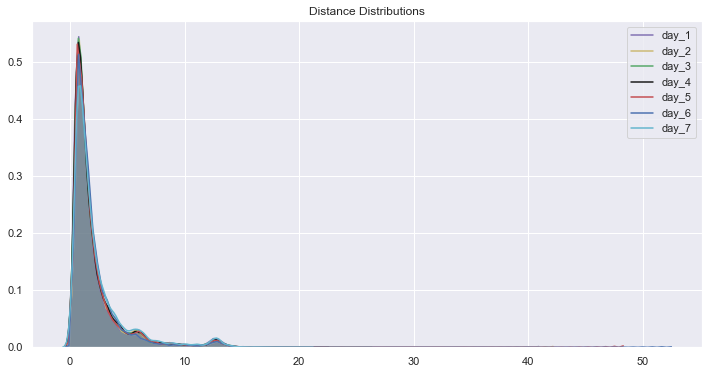

In [45]:
test = "distance"
#extracting and plotting the days vs distances
mday = df[df["weekday"] == "Monday"][test]
tuday = df[df["weekday"] == "Tuesday"][test] 
wedday = df[df["weekday"] == "Wednesday"][test]                                                   
thuday = df[df["weekday"] == "Thursday"][test]
friday = df[df["weekday"] == "Friday"][test] 
satday = df[df["weekday"] == "Saturday"][test] 
sday = df[df["weekday"] == "Sunday"][test] 



fig, ax = plt.subplots(1,1,figsize=(12,6)) 

sns.kdeplot(mday, shade=True, label="day_1", ax=ax, color="m")
sns.kdeplot(tuday, shade=True, label="day_2", ax=ax, color="y")
sns.kdeplot(wedday, shade=True, label="day_3", ax=ax, color="g")
sns.kdeplot(thuday, shade=True, label="day_4", ax=ax, color="k")
sns.kdeplot(friday, shade=True, label="day_5", ax=ax, color="r")
sns.kdeplot(satday, shade=True, label="day_6", ax=ax, color="b")
sns.kdeplot(sday, shade=True, label="day_7", ax=ax, color="c")
plt.title("Distance Distributions")
plt.show()

In [44]:
stats.f_oneway(day_1, day_2, day_3, day_4, day_5, day_6, day_7) 
#doing the test

F_onewayResult(statistic=25.93463945320299, pvalue=5.289681900616254e-31)

In [ ]:
#as we can see, p value is smaller than 0.05, so this hypothesis is accepted. distance has no relation with
# weekdays.